# 1. Importing the libraries

In [180]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

import csv
%matplotlib notebook

# 2. Load the dataset

In [131]:
feature_names = np.loadtxt(open('heart.csv', 'rb'), delimiter=',', max_rows=1, dtype = str)
feature_names = feature_names[:-1]
data = np.loadtxt(open('heart.csv', 'rb'), delimiter=',', skiprows=1, dtype = str)

X = data[:,:-1].astype(np.float)
y = data[:,-1].astype(np.int)

number_of_features = X.shape[1]
number_of_classes = len(np.unique(y))


# 3. Visualizations
## 3.1 bar chart, heart disease by gender

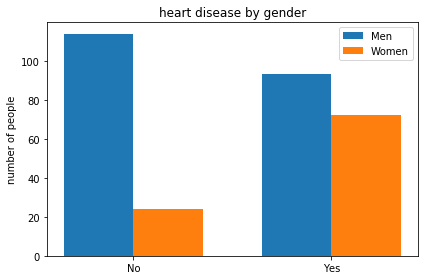

In [169]:
labels = ['No', 'Yes']
total = X[:,1]
men = [0,0]
women = [0,0]
for i in range(len(total)):
    men[1] += (total[i] == 1 and y[i] == 1)
    men[0] += (total[i] == 1 and y[i] == 0)
    women[1] += (total[i] == 0 and y[i] == 1)
    women[0] += (total[i] == 0 and y[i] == 0)
    
    
    
coor_names = ["No", "Yes"]

x = np.arange(len(labels))


width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, men, width, label='Men')
rects2 = ax.bar(x+width/2, women, width, label='Women')
ax.set_ylabel('number of people')
ax.set_title('heart disease by gender')
ax.set_xticks(x)
ax.set_xticklabels(coor_names)
ax.legend()
fig.tight_layout()
plt.show()




## 3.2 Bar chart - heart disease by age

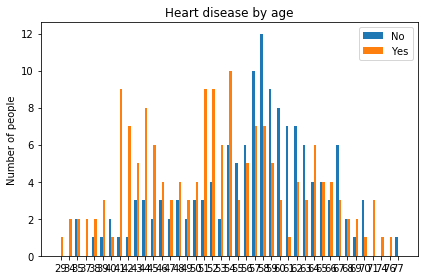

In [170]:
total = X[:,0].astype(int)
ages = np.unique(total) # every age number that appears

x = np.arange(len(ages)) # x label locations

count = np.zeros((78,2)) # 78 = oldest age
for i in range(len(total)):
    count[total[i],0] += (y[i] == 0)
    count[total[i],1] += (y[i] == 1)

width = 0.30


fig, ax = plt.subplots()
elements = np.empty((0,2),int)
for (i, j) in count:
    if i !=0 or j != 0:
        elements = np.append(elements, np.array([[i,j]]), axis=0)
        

rects1 = ax.bar(x-width/2, elements[:,0], width, label="No")
rects2 = ax.bar(x+width/2, elements[:,1], width, label="Yes")

ax.set_ylabel("Number of people")
ax.set_title("Heart disease by age")
ax.set_xticks(x)
ax.set_xticklabels(ages)
ax.legend()
fig.tight_layout()
plt.show()





## 3.3 Age histogram

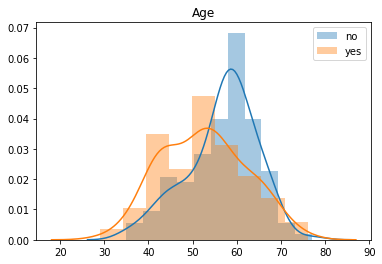

In [166]:

ax = plt.subplots()
plt.title("Age") 

for class_i in range(number_of_classes): #After that we draw the within-class histograms of the same feature
    sns.distplot(X[y == class_i,0], label=target_names[class_i]) # (X[y==c,i] means we get the i'th column of X where the class in the same row in y is equal to c
plt.legend()
plt.show()

## 3.3 Age x Blood pressure scatterplot

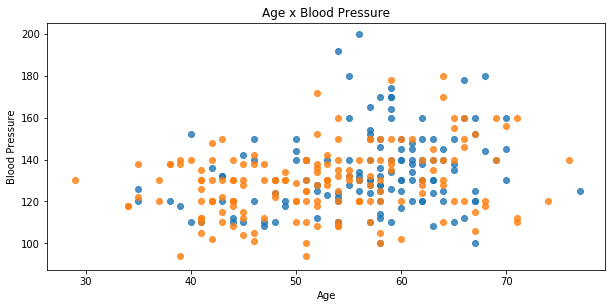

In [54]:
fig = plt.figure(figsize=(10,10))
plt.title("scatterplots") 

ax = plt.subplot(2, 1, 1)
ax.set_title("Age x Blood Pressure")
ax.set_xlabel("Age")
ax.set_ylabel("Blood Pressure")
plt.scatter(X[y==0,0], X[y==0, 3], alpha=0.8)
plt.scatter(X[y==1, 0], X[y==1, 3], alpha=0.8)



        
plt.show()
            


#  3.4 between feature dependence

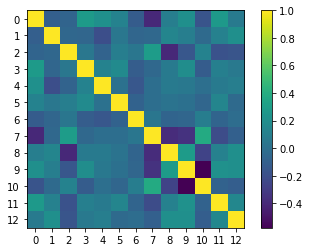

In [38]:
correlation_matrix = np.zeros((number_of_features, number_of_features))
for i in range(number_of_features):
    measure = X[:,i]
    for j in range(number_of_features):
        measure2 = X[:,j]
        corr, _ = stats.pearsonr(measure, measure2)
        correlation_matrix[i][j] = corr
plt.figure()
plt.imshow(correlation_matrix)
plt.xticks(np.arange(number_of_features))
plt.yticks(np.arange(number_of_features))
plt.colorbar()
plt.show()

# 4. Classification
## 4.1 Splitting the data set

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## 4.2 Naive Bayes 

In [173]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
accuracy = np.round(np.sum(y_pred==y_test)/len(y_test),3)
print(accuracy)

0.835


## 4.3 LDA

In [176]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_prediction = lda.predict(X_test)
lda_accuracy = np.round(np.sum(lda_prediction==y_test)/len(y_test), 3)
print(lda_accuracy)

0.802


## 4.4 QDA

In [182]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_prediction = qda.predict(X_test)
qda_accuracy = np.round(np.sum(qda_prediction == y_test)/len(y_test), 3)
print(qda_accuracy)

0.791
